In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
d = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,3
5,6,3
6,7,4
7,8,4
8,9,5
9,10,5


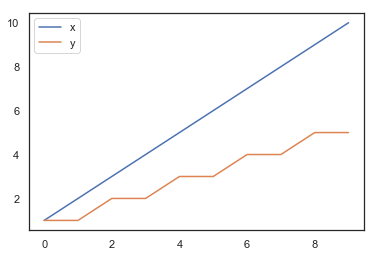

In [20]:
dataset.plot()

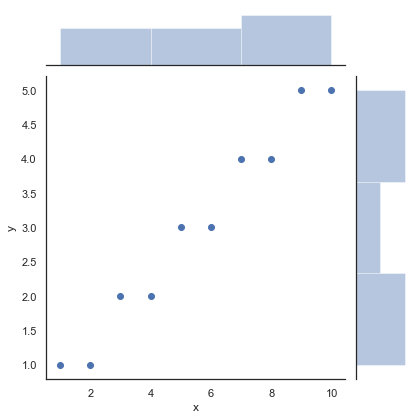

In [21]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=dataset,x='x', y='y')

In [4]:
# descriptions
print(dataset.describe())

              x          y
count  10.00000  10.000000
mean    5.50000   3.000000
std     3.02765   1.490712
min     1.00000   1.000000
25%     3.25000   2.000000
50%     5.50000   3.000000
75%     7.75000   4.000000
max    10.00000   5.000000


In [5]:
# class distribution
print(dataset.groupby('y').size())

y
1    2
2    2
3    2
4    2
5    2
dtype: int64


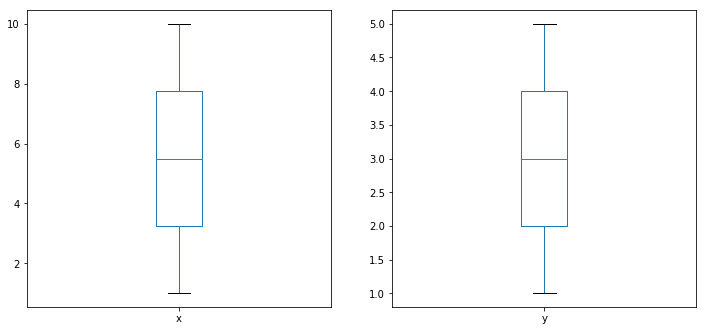

In [6]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 12))
pyplot.show()

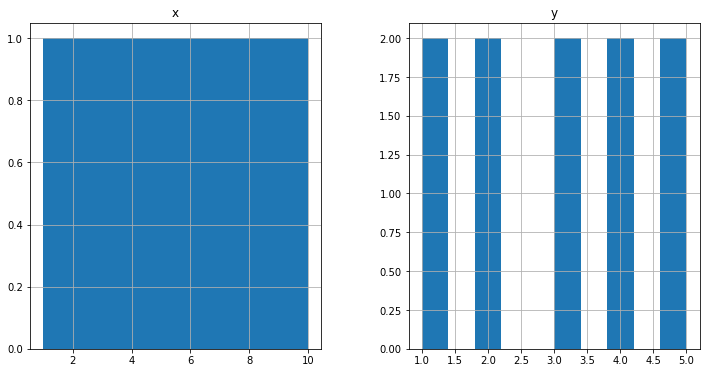

In [7]:
# histograms
dataset.hist(figsize=(12, 6))
pyplot.show()

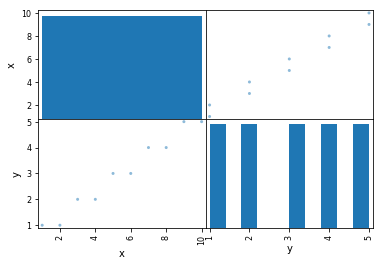

In [8]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [9]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
array = dataset.values
X = array[:,0:1]
Y = array[:,1]

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [12]:
Y

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

In [13]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [14]:
X_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [15]:
X_test

array([[9],
       [2],
       [6]])

In [16]:
y_train

array([1, 4, 2, 5, 3, 2, 4])

In [17]:
y_test

array([5, 1, 3])

In [18]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=2, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR: 0.000000 (0.000000)
CART: 0.200000 (0.000000)
NB: 0.000000 (0.000000)
SVM: 0.000000 (0.000000)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


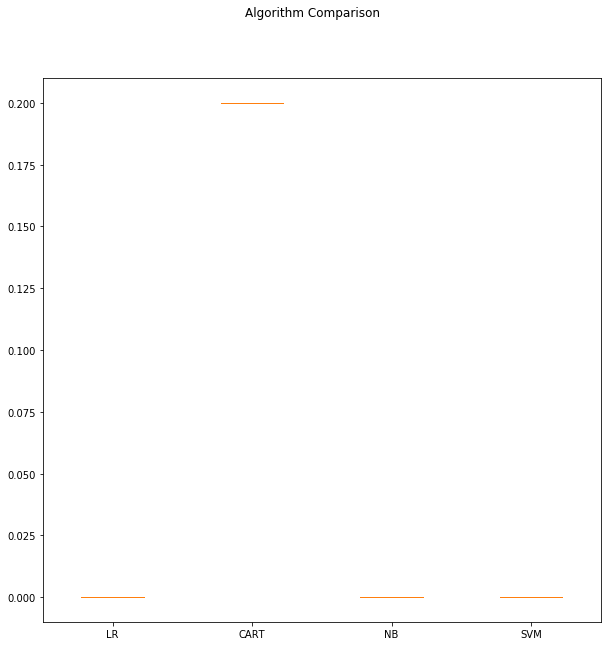

In [19]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict(X_test)
predictions = clf.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[5 1 3]
1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



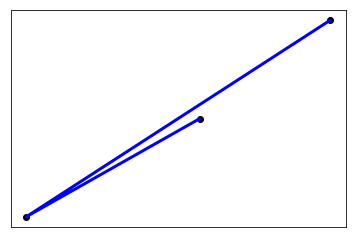

In [21]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### dataset random x

In [1]:
import pandas as pd
import numpy as np
from statistics import mean

In [2]:
d = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset2 = pd.DataFrame(data=d)
dataset2

,x,y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,3
5,6,3
6,7,4
7,8,4
8,9,5
9,10,5


In [3]:
mean_x = mean(dataset2['x'])
mean_x

5.5

In [4]:
mean_y = mean(dataset2['y'])
mean_y

3

B0 = mean(y) - B1 * mean(x)

B1 = corr(x; y) . stdev(y) / stdev(x)

In [5]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [6]:
print(pearson_def([1,2,3,4,5,6,7,8,9,10], [1,1,2,2,3,3,4,4,5,5]))

0.9847319278346618


In [7]:
std_x = np.std(dataset2['x'])
std_x

2.8722813232690143

In [8]:
std_y = np.std(dataset2['y'])
std_y 

1.4142135623730951

In [9]:
B1 = pearson_def([1,2,3,4,5,6,7,8,9,10], [1,1,2,2,3,3,4,4,5,5]) * (std_y / std_x)
B1

0.4848484848484848

In [12]:
B0 = mean_y - B1 * mean_x
B0

0.3333333333333335

## dataset random x

In [13]:
data_x = np.random.randint(10, size=10)
data_x

array([6, 6, 4, 1, 5, 5, 3, 5, 9, 4])

In [14]:
data_y = []
for i in data_x:
    y_ = B0 + B1 * i    
    data_y.append(y_)

    print(data_y)

[3.242424242424242]
[3.242424242424242, 3.242424242424242]
[3.242424242424242, 3.242424242424242, 2.2727272727272725]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573, 2.7575757575757573]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573, 2.7575757575757573, 1.7878787878787878]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573, 2.7575757575757573, 1.7878787878787878, 2.7575757575757573]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573, 2.7575757575757573, 1.7878787878787878, 2.7575757575757573, 4.696969696969697]
[3.242424242424242, 3.242424242424242, 2.2727272727272725, 0.8181818181818183, 2.7575757575757573, 2.75757575

In [15]:
df = pd.DataFrame({'x': data_x,
                   'y': data_y})

In [16]:
df

,x,y
0,6,3.242424
1,6,3.242424
2,4,2.272727
3,1,0.818182
4,5,2.757576
5,5,2.757576
6,3,1.787879
7,5,2.757576
8,9,4.696970
9,4,2.272727


In [17]:
df_ = round(df)
df_

,x,y
0,6,3.0
1,6,3.0
2,4,2.0
3,1,1.0
4,5,3.0
5,5,3.0
6,3,2.0
7,5,3.0
8,9,5.0
9,4,2.0


In [18]:
d3 = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset3 = pd.DataFrame(data=d3)
dataset3

,x,y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,3
5,6,3
6,7,4
7,8,4
8,9,5
9,10,5


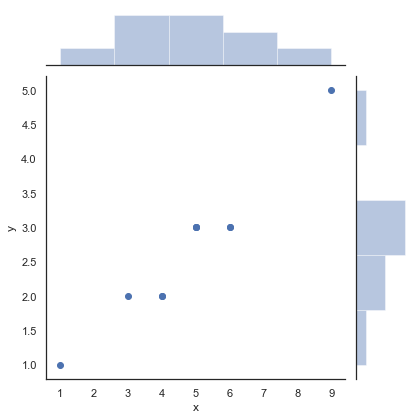

In [25]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=df_,x='x', y='y')

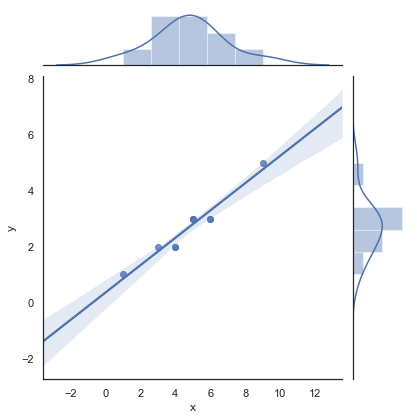

In [26]:
 g = sns.jointplot("x", "y", data=df_, kind="reg")

In [27]:
df.shape

(10, 2)

In [28]:
std_x2 = np.std(df['x'])
std_x2

1.98997487421324

In [29]:
std_y2 = np.std(df['y'])
std_y2

0.9648363026488437

In [30]:
B1_2 = pearson_def([11,12,13,14,15,16,17,18,19,20], [5.598076,6.070454,6.542831,7.015209,7.487586,7.959964,8.432341,8.904719,9.377096,9.849474]) * (std_y2 / std_x2)
B1_2

0.48484848484847687